In [13]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [14]:
S0 = 10
K = 10
sigma = 0.5
n_sim = 1000
n_time = 252
T = 1/2
dt = 1/252
r = 0.03
type_ = "P"

In [15]:
def get_bsm_price(sigma, S0, K, r, T, type_):

    d1 = (np.log(S0/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    if type_ == "C":
        O = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

    else:
        O = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)

    return O

In [16]:
bsm_price = get_bsm_price(sigma, S0, K, r, T, type_)
bsm_price

1.3195167930515002

In [17]:
def get_gbms(mu, sigma, n_sim, n_time, S0, dt):

    gbms = np.ones(shape=(n_time, n_sim)) * S0
    
    W_t = np.random.standard_normal(size=gbms.shape)

    for i in range(1, gbms.shape[0]):

        gbms[i] = gbms[i-1] * np.exp((mu - sigma**2/2) * dt + sigma * W_t[i] * np.sqrt(dt))

    return gbms

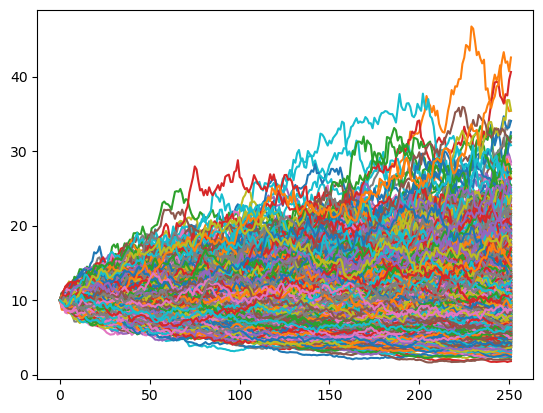

In [18]:
plt.plot(get_gbms(r, sigma, n_sim, n_time, S0, dt))
plt.show()

In [19]:
dt = 1/2
n_time = 2
n_sim = 1000000

In [20]:
def get_monte_carlo_price(mu, sigma, n_sim, n_time, S0, r, T, dt, type_):
    
    S = get_gbms(r, sigma, n_sim, n_time, S0, dt)

    if type_ == "C":
        
        payoffs = np.maximum(S[-1, :] - K, 0)

    else:

        payoffs = np.maximum(K-S[-1, :], 0)

    O = np.exp(-r * T) * np.mean(payoffs)
    
    return O

In [21]:
list_price = []
for _ in range(100):
    list_price.append(get_monte_carlo_price(r, sigma, n_sim, n_time, S0, r, T, dt, type_))

In [22]:
np.mean(list_price)

1.319495106249961

In [23]:
array_plot = []

for i in np.logspace(2, 6, 5):
    for _ in range(20):
        array_plot.append([round(np.log(i)/np.log(10)), get_monte_carlo_price(r, sigma, int(i), n_time, S0, r, T, dt, type_)])

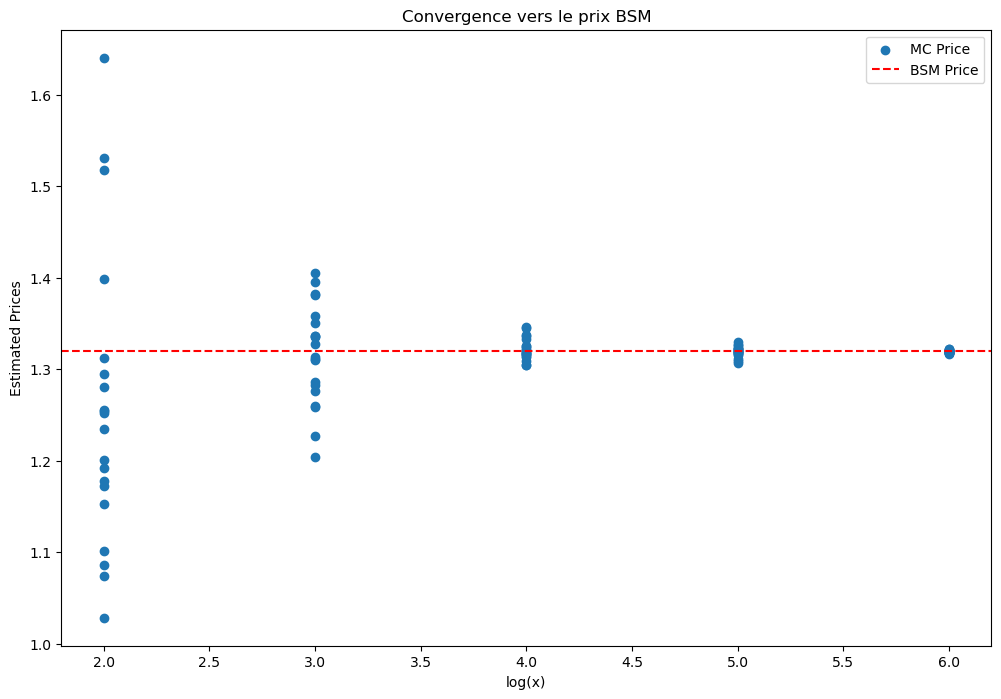

In [24]:
array_plot = np.array(array_plot)

plt.figure(figsize=(12, 8))
plt.title(r"Convergence vers le prix BSM")
plt.xlabel(r"log(x)")
plt.ylabel(r"Estimated Prices")
plt.scatter(x=array_plot[:, 0], y=array_plot[:, 1], label='MC Price')
plt.axhline(y=bsm_price, linestyle='dashed', color='red', label='BSM Price')
plt.legend()
plt.show()